In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import keras

#import tensorflow_datasets as tfds

In [ ]:
def ctc_loss(y_true, y_pred):
    # Compute the CTC loss using TensorFlow's ctc_loss function
    ctc_loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length=tf.math.reduce_sum(y_pred, axis=-1, keepdims=False), label_length=tf.math.count_nonzero(y_true, axis=-1, keepdims=False))

    # Return the average loss across the batch
    return tf.reduce_mean(ctc_loss)

In [ ]:
import tensorflow as tf

def JasperBlock(x,num_filters,kernel_size,dilation_rate,dropout_rate,repeats,train):
  residual = x

  for i in range(0,repeats-1):
    x = tf.keras.layers.Conv1D(filters=num_filters,kernel_size= kernel_size, padding='same', dilation_rate=dilation_rate,trainable=train)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

  x = tf.keras.layers.Conv1D(filters=num_filters,kernel_size= kernel_size, padding='same', dilation_rate=dilation_rate,trainable = train)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  residual = tf.keras.layers.Conv1D(filters=num_filters,kernel_size= kernel_size, padding='same')(residual)
  residual = tf.keras.layers.BatchNormalization()(residual)
  x = tf.keras.layers.add([x,residual],trainable=train)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x)

  return x

def CreateSR(y, num_classes):
  y = tf.keras.layers.Flatten()(y)
  y = tf.keras.layers.Dense(256, activation = "relu")(y)
  y = tf.keras.layers.Dense(128, activation = "relu")(y)
  y = tf.keras.layers.Dense(num_classes, activation = "softmax")(y)
  # y = tf.keras.layers.Activation(num_classes)(y)


  return y

def JasperBlock2ret(x,num_filters,kernel_size,dilation_rate,dropout_rate, repeats):
  residual = x

  for i in range(0,repeats-1):
    x = tf.keras.layers.Conv1D(filters=num_filters,kernel_size= kernel_size, padding='same', dilation_rate=dilation_rate)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

  x = tf.keras.layers.Conv1D(filters=num_filters,kernel_size= kernel_size, padding='same', dilation_rate=dilation_rate)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  residual = tf.keras.layers.Conv1D(filters=num_filters,kernel_size= kernel_size, padding='same')(residual)
  residual = tf.keras.layers.BatchNormalization()(residual)
  x = tf.keras.layers.add([x,residual])
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x)

  return x, x

def create_Jasper(inputs,num_blocks,num_sublocks):
  fil = [256,384,512,640,768]
  ker = [11,13,17,21,25]

  x = tf.keras.layers.Conv1D(filters=256,kernel_size=11,strides=2,padding='same',dilation_rate=1)(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)


  for i in range(num_blocks):
    if i==1:
      x,y = JasperBlock2ret(x,num_filters=fil[i],kernel_size=ker[i],dilation_rate=1,dropout_rate=0.2,repeats=3)
      y = CreateSR(y, 251)
    if i<1:
      x = JasperBlock(x,num_filters=fil[i],kernel_size=ker[i],dilation_rate=1,dropout_rate=0.2,repeats = 3,train = True)
    elif i>1:
      x = JasperBlock(x,num_filters=fil[i],kernel_size=ker[i],dilation_rate=1,dropout_rate=0.2,repeats =3,train = False)



  return x,y

inputs = tf.keras.layers.Input(shape = (13,3496))
output1,output2 = create_Jasper(inputs,5,1)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# model.compile(optimizer=optimizer, loss=tf.keras.backend.ctc_batch_cost)
#model = keras.Model(inputs=inputs, outputs=[output1,output2], name="mnist_model")
#model.summary()


IndentationError: ignored

In [ ]:
model_sv = keras.Model(inputs=inputs, outputs =output2 )
model_sv.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 13, 3496)]   0           []                               
                                                                                                  
 conv1d_52 (Conv1D)             (None, 7, 256)       9844992     ['input_5[0][0]']                
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 256)      1024        ['conv1d_52[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_39 (Activation)     (None, 7, 256)       0           ['batch_normalization_51[0]

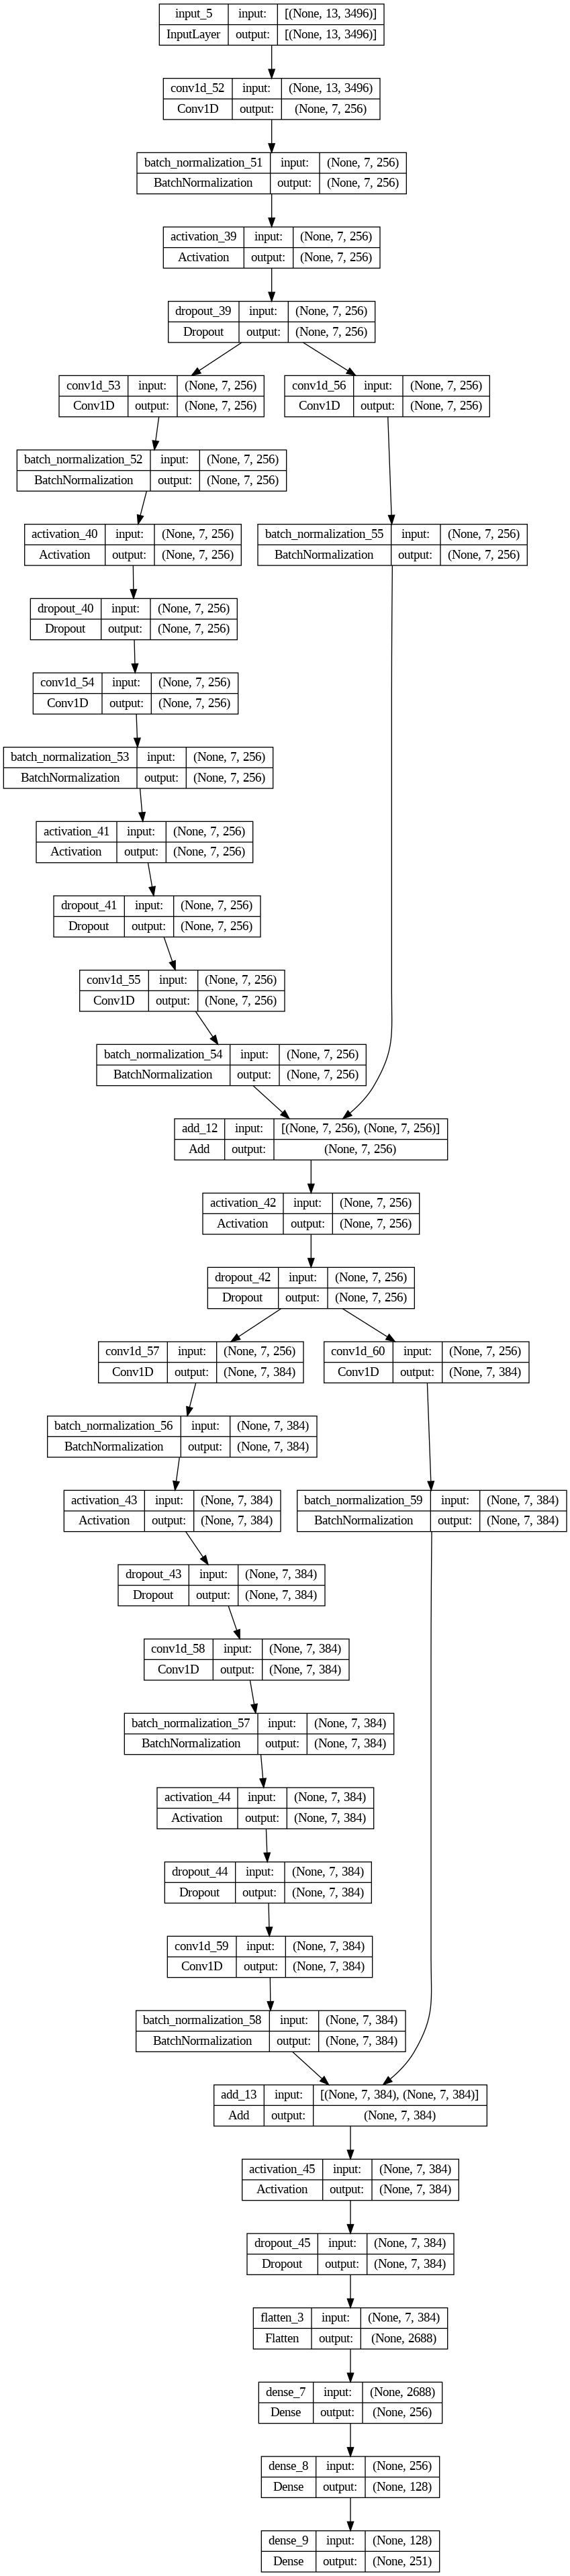

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_sv, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import pickle
import gc
with open('/content/drive/MyDrive/Train_100/mfcc.pkl','rb') as f:
  mfcc_input = pickle.load(f)
mfcc_input_np = np.asarray(mfcc_input, 'float16')


In [ ]:
del mfcc_input
gc.collect()

27280

In [ ]:
mfcc_input_np.shape

(28539, 3496, 13)

In [ ]:
mfcc_input_np[0]

array([[-7.015e+02,  1.045e+00,  7.549e-01, ...,  1.087e+00,  7.593e-01,
         7.378e-01],
       [-7.015e+02,  1.103e+00,  7.251e-01, ...,  1.167e+00,  7.432e-01,
         7.178e-01],
       [-7.015e+02,  9.419e-01,  5.649e-01, ...,  1.016e+00,  5.942e-01,
         5.713e-01],
       ...,
       [-7.025e+02,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-7.025e+02,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-7.025e+02,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00]], dtype=float16)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Train_100/train_clean_100.xlsx')

In [ ]:
id = df['id']

In [ ]:
del df

In [ ]:
gc.collect()

28664

In [ ]:
model_sv.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model_sv.fit(mfcc_input_np,id,batch_size = 256, epochs = 10,verbose=True)